# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)


# Importando dados e bibliotecas


## Importando principais bibliotecas e os dados


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos `sm_train` e `sm_val` derivados da classe `SMOTE` do pacote `imblearn.over_sampling`.


In [4]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 60%-20%-20%
train_size_f = int(n_examples_f*0.6)
val_size_f = int(n_examples_f*0.2)
test_size_f = n_examples_f - train_size_f - val_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)
sm_val = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)
X_val,y_val = sm_val.fit_resample(X_val,y_val)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Mudança de escala para facilitar o treinamento
sc_y = MinMaxScaler()

X_train_sc = sc_y.fit_transform(X_train)
X_val_sc = sc_y.transform(X_val)
X_test_sc = sc_y.transform(X_test)

# Modelos de Classificação

Nesta primeira abordagem utilizaremos modelos simples para previsão de fraudes, escolhidos através de validação cruzada com escolha aleatória dos hiperparâmetros, com a classe `RandomizedSearchCV()` do `sklearn.model_selection`.

Utilizamos a classe `SGDClassifier` do pacote `sklearn` para classificar os dados. Basicamente este modelo realiza a previsão das classe com classificadores lineares, treinando com métodos estocásticos. Esta classe possui os seguintes hiperparâmetros:

- `alpha`: este é um parâmetro de regularização que controla o peso das penalidades. A distribuição utilizada na escolha aleatória deste hiperparâmetro é `loguniform(1e-4,1e1)`.

- `penalty`: este é um parâmetro de regularização que controla o tipo de penalidade. Os hiperparâmetros escolhidos com probabilidade uniforme são `('l1','l2')`.

- `loss`: este é um parâmetro que controla o tipo de classificação. Aqui essencialmente utilizaremos dois parâmetros para definir modelos separados, que são os seguintes:

  - `'hinge'`: este tipo de _loss_ define o modelo SVM estocástico. Ou seja, estamos de certa forma tentando maximizar a separação entre as classes, porém por ser estocástico tem a vantagem de possuir um treinamento mais rápido e também ser menos propenso à _overfitting_, pelo fato de que não utilizar todos os dados de treino ao mesmo tempo.

  - `'log'`: este tipo de _loss_ define o modelo de regressão logística com treinamento estocástico. Neste caso o treinamento tenta deixar as distribuições de probabilidades preditas mais próximas aos valores reais.


In [6]:
# Save performance
import json


# Distribuições
from scipy.stats import loguniform


# Modelos
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Barra de progresso
from tqdm import tqdm

# Seleção de modelos
from sklearn.model_selection import RandomizedSearchCV


# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})






# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(f'\n{s}')
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                    'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
    # Previsão dos dados de validação
    y_pred = best_model_.predict(X_val_sc)
    # Resultados dos dados de validação
    Results.update({f'{s} Validation':{'CV_score':cv_score,
                    'Precisão Balanceada':balanced_accuracy_score(y_val.reshape(-1),y_pred.reshape(-1)),
                    'Classification Report':classification_report(y_val.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                    'Matriz de Confusão':confusion_matrix(y_val.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)
with open("performance/performance_supervised.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]


SGD SVM



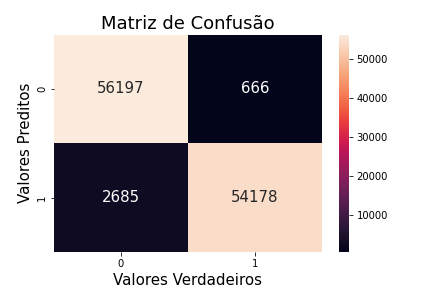
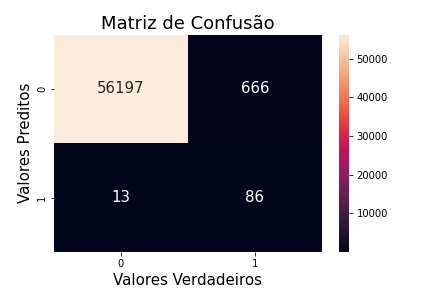
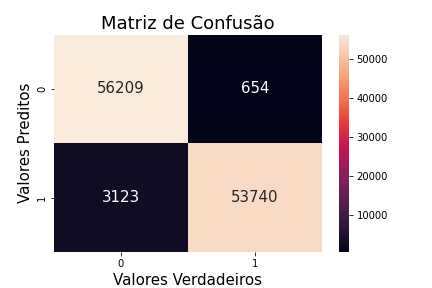
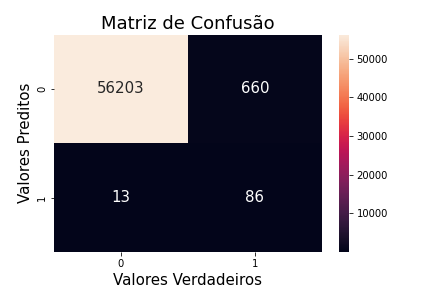

In [ ]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Validation','Test')
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      # html += '<p>CV_score: {:1.4f}</p>\n'.format(results_dict['CV_score'])
      # html += '<p>Classification Report:</p>\n'
      # class_report = pd.DataFrame(results_dict['Classification Report']).T
      # class_report = np.round(class_report,4)
      # class_report["support"] = class_report["support"].astype(int)
      # html += class_report.to_html()
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test1.html','w',encoding='utf-8') as f:
  f.write(html)

# Selecionando Variáveis

Podemos ver que nos dados de validação e teste os modelos SVM e de Regressão Logística tiveram desempenhos similares. Testando os dois modelos, o modelo que apresentou os melhores resultados de seleção via Forward Selection foi o SVM, que será a única seleção mostrada neste notebook.


In [ ]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

best_model_ = Best_model['SGD SVM']


# Selecionando as melhores variáveis
# Forward Selection
sfs1 = sfs(best_model_,k_features=12,forward=True,verbose=12,scoring='balanced_accuracy',n_jobs=-1)
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train.ravel())
X_test_sc_features = sfs1.transform(X_test_sc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [ ]:
# Performance (cross-validation) for each number of features
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
1,"(14,)","[0.9259188698047951, 0.9273990269066181, 0.926...",0.926505,"(14,)"
2,"(4, 14)","[0.938111847118823, 0.9394161439709244, 0.9384...",0.938994,"(4, 14)"
3,"(4, 12, 14)","[0.9427867987572542, 0.9443695410047482, 0.944...",0.943997,"(4, 12, 14)"
4,"(4, 8, 12, 14)","[0.94456005627528, 0.946157453543584, 0.945717...",0.945647,"(4, 8, 12, 14)"
5,"(4, 8, 10, 12, 14)","[0.9464212439181664, 0.9479014010199894, 0.946...",0.947233,"(4, 8, 10, 12, 14)"
6,"(4, 6, 8, 10, 12, 14)","[0.9471686499794829, 0.9483703616859136, 0.947...",0.947925,"(4, 6, 8, 10, 12, 14)"
7,"(4, 6, 8, 10, 12, 13, 14)","[0.9477548508118883, 0.9493522480801924, 0.948...",0.948646,"(4, 6, 8, 10, 12, 13, 14)"
8,"(4, 6, 8, 10, 12, 13, 14, 26)","[0.9481945014361921, 0.9496453484963949, 0.948...",0.949041,"(4, 6, 8, 10, 12, 13, 14, 26)"
9,"(4, 6, 8, 9, 10, 12, 13, 14, 26)","[0.9489565625183187, 0.9500117240166481, 0.949...",0.949583,"(4, 6, 8, 9, 10, 12, 13, 14, 26)"
10,"(4, 6, 8, 9, 10, 12, 13, 14, 26, 27)","[0.9492643179553315, 0.9500117240166481, 0.949...",0.949947,"(4, 6, 8, 9, 10, 12, 13, 14, 26, 27)"


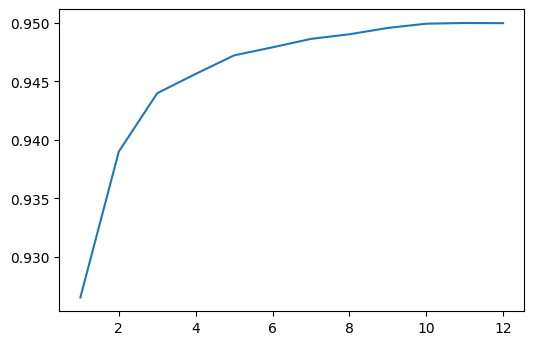

In [ ]:
# Features plot cross-validation average score
fig = plt.figure(dpi = 100)
plt.plot(feature_selection['avg_score'])
plt.show()

In [ ]:
feature_selection['avg_score'] = feature_selection['avg_score'].astype(float)
feature_selection['avg_score']

1     0.926505
2     0.938994
3     0.943997
4     0.945647
5     0.947233
6     0.947925
7     0.948646
8     0.949041
9     0.949583
10    0.949947
11    0.950006
12    0.949991
Name: avg_score, dtype: float64

Neste caso, vemos que os valores onde o desempenho do Forward Selection começa a estagnar é entre 3 e 5 variáveis. Assim iremos escolher 5 variáveis.


In [ ]:
features_selected = [4, 8, 10, 12, 14]
feature_names = list(dataset.columns[features_selected])


X_train_features = X_train[:,features_selected]
X_val_features = X_val[:,features_selected]
X_test_features = X_test[:,features_selected]


X_train_sc_features = X_train_sc[:,features_selected]
X_val_sc_features = X_val_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

print('Selected Features:')
print_string = ''
for x in feature_names:
  print_string += x + '\n'
print(print_string)

Selected Features:
V4
V8
V10
V12
V14



In [ ]:
# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})









# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc_features,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({f'{s} Test':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
    # Previsão dos dados de validação
    y_pred = best_model_.predict(X_val_sc_features)
    # Resultados dos dados de validação
    Results.update({f'{s} Validation':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_val.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_val.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_val.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)

with open("performance/performance_supervised_features.json","w",encoding='utf-8') as f:
    json.dump(Results,f)
with open("performance/hyperparams_features.json","w",encoding='utf-8') as f:
    json.dump(Best_params,f)

  0%|          | 0/2 [00:00<?, ?it/s]

SGD SVM


 50%|█████     | 1/2 [00:35<00:35, 35.53s/it]

SGD LR


100%|██████████| 2/2 [01:13<00:00, 36.69s/it]



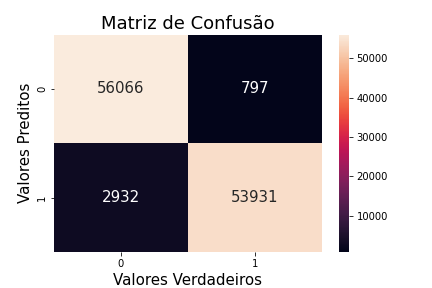
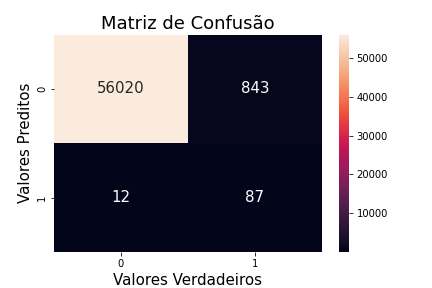
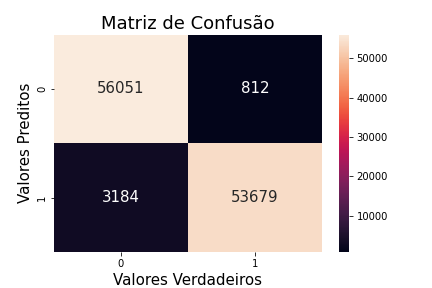
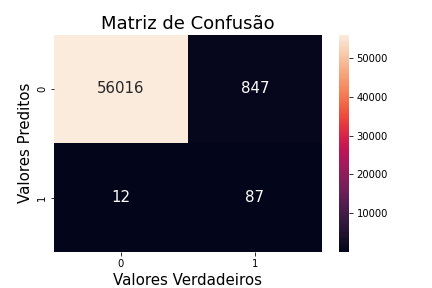

In [ ]:
from IPython.core.display import HTML
import base64
from io import BytesIO
html = '''
<h1>Desempenho dos Modelos</h1>
'''

for model in models.keys():
    # Melhor modelo
    best_model_ = Best_model[model]
    html += f'<h2>{model}</h2>'

    # Apresentando o desempenho nos dados de validação e teste
    val_test = ('Validation','Test')
    n_cols = len(val_test)
    for sufix in val_test:
      html += '\n<div>\n'
      html += f'<h3>{sufix}:</h3>\n'
      results_dict = Results[f"{model} {sufix}"]
      html += '<p>Precisão Balanceada: {:1.4f}</p>\n'.format(results_dict['Precisão Balanceada'])
      # html += '<p>CV_score: {:1.4f}</p>\n'.format(results_dict['CV_score'])
      # html += '<p>Classification Report:</p>\n'
      # class_report = pd.DataFrame(results_dict['Classification Report']).T
      # class_report = np.round(class_report,4)
      # class_report["support"] = class_report["support"].astype(int)
      # html += class_report.to_html()
      html += '<p>Matriz de Confusão:</p>\n'

      fig = plt.figure()
      ax = plt.gca()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d',ax=ax,annot_kws={"size":15})
      ax.set_title('Matriz de Confusão',fontsize=18)
      ax.set_xlabel('Valores Verdadeiros',fontsize=15)
      ax.set_ylabel('Valores Preditos',fontsize=15)
      fig.patch.set_alpha(1.0)
      
      tmpfile = BytesIO()
      fig.savefig(tmpfile)
      encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
      html += '\n<img src=\'data:image/png;base64,{}\'>\n'.format(encoded)
      html += '\n</div>\n'
plt.close("all")
display(HTML(html))
with open('performance/html_performance_test2.html','w',encoding='utf-8') as f:
  f.write(html)

A partir destes resultados vemos bom desempenho da regressão logística e do SVM, que apesar de bastante simples, ainda geraram bons resultados, equilibrando bem o recall tanto da classe não-fraude quanto da classe fraude.

Além disso, o modelo SVM teve uma leve melhora no recall de ambas as classes, que é o principal objetivo. Ou seja, aumentar o número de fraudes corretamente classificadas, porém sem comprometer muito os casos em que não há fraude.

Vamos calibrar o limiar da regressão logística para verificar se podemos melhorar ainda mais essa precisão. Não podemos realizar o mesmo procedimento para o SVM porque este não possui uma boa estimativa de probabilidades.


In [ ]:
best_model = Best_model['SGD LR']

In [ ]:
val_prob = best_model.predict_proba(X_val_sc_features)
val_prob = val_prob[:,1]

test_prob = best_model.predict_proba(X_test_sc_features)
test_prob = test_prob[:,1]

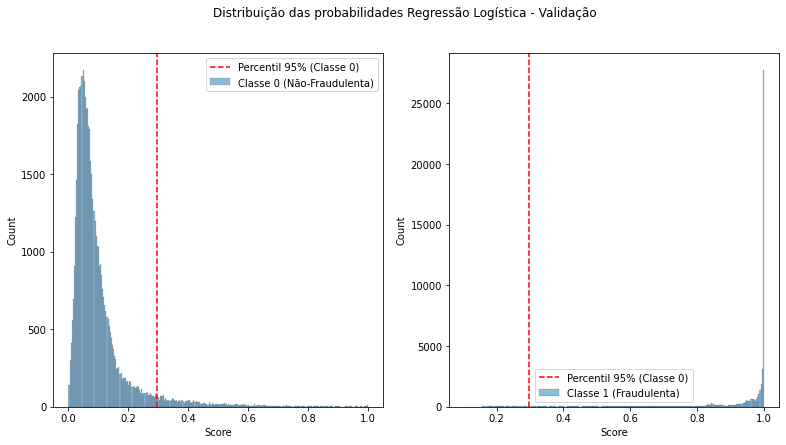

In [ ]:
# Probabilidade (Não-Fraude)
val_prob_nf = val_prob[y_val == 0]
data_nf = np.concatenate((val_prob_nf,np.zeros_like(val_prob_nf)))
data_nf = data_nf.reshape((-1,2),order="F")


# Probabilidade (Fraude)
val_prob_f = val_prob[y_val == 1]
data_f = np.concatenate((val_prob_f,np.ones_like(val_prob_f)))
data_f = data_f.reshape((-1,2),order="F")


# Concatenando dados em um dataframe
data = pd.DataFrame(np.concatenate([data_nf,data_f]),columns=["Score","Class"])


fig,axes = plt.subplots(1,2)
fig.set_size_inches(6.5*2,6.5*1)

axes = axes.ravel()

# Plotando probabilidades por classe
ax = axes[0]
sns.histplot(data=data[data["Class"] == 0], x="Score", hue="Class", ax=ax, legend=False)
ax.axvline(data[data["Class"] == 0]["Score"].quantile(0.95), c="r", ls="--")
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 0 (Não-Fraudulenta)"])


ax = axes[1]
sns.histplot(data=data[data["Class"] == 1], x="Score", hue="Class", ax=ax)
ax.axvline(data[data["Class"] == 0]["Score"].quantile(0.95), c="r", ls="--")
ax.legend(labels=["Percentil 95% (Classe 0)","Classe 1 (Fraudulenta)"])



fig.suptitle("Distribuição das probabilidades Regressão Logística - Validação")
fig.patch.set_alpha(1.0)
fig.savefig('figures/part1/prob_hist_reglog.pdf', bbox_inches='tight')
fig.savefig('figures/part1/prob_hist_reglog.png', bbox_inches='tight')
plt.show()

### Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências:

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)


#### G-Mean


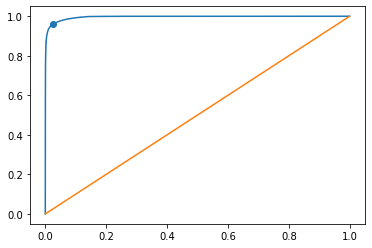

Best Threshold: 0.4093
Area Under the Curve: 0.9962


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.9628 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.960399,0.975397,0.967840,56863.000000
1.0,0.975007,0.959781,0.967334,56863.000000
accuracy,0.967589,0.967589,0.967589,0.967589
macro avg,0.967703,0.967589,0.967587,113726.000000
weighted avg,0.967703,0.967589,0.967587,113726.000000


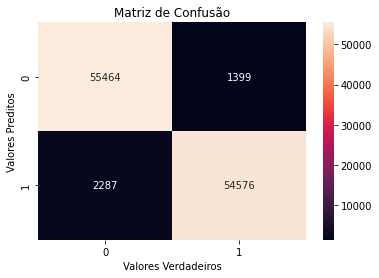

In [ ]:
# Utilizando as métricas Fbeta, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")
beta = 2

print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.2255 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999784,0.974570,0.987016,56863.000000
1.0,0.056751,0.878788,0.106618,99.000000
accuracy,0.974404,0.974404,0.974404,0.974404
macro avg,0.528267,0.926679,0.546817,56962.000000
weighted avg,0.998145,0.974404,0.985486,56962.000000


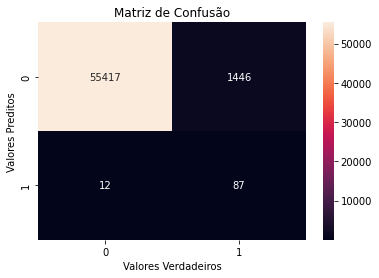

In [ ]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### $F_{\beta}$

O método $F_{\beta}$ encontra a limiar maximizando a quantidade $F_{\beta}$.


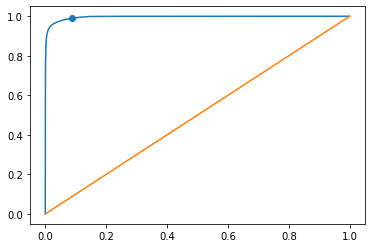

Best Threshold: 0.2124
Area Under the Curve: 0.9962


In [ ]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

n_thresholds = 50
np.random.seed(42)
random_thresholds = np.random.rand(n_thresholds)*(val_prob.max() - val_prob.min()) + val_prob.min()
np.random.seed(None)

# Neste caso vamos maximizar o f-beta com beta = 2
beta = 2
fbeta_scores = np.zeros((n_thresholds))
for j in range(n_thresholds):
  y_val_pred = (val_prob>=random_thresholds[j])
  fbeta_scores[j] = fbeta_score(y_val,y_val_pred,beta=beta)


# Encontrando o limiar com maior valor de fbeta
j_max = fbeta_scores.argmax()

threshold = random_thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
y_val_pred_fbeta = (val_prob>=threshold)


y_test_pred_fbeta = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.9744 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.988927,0.910979,0.948354,56863.00000
1.0,0.917483,0.989800,0.952271,56863.00000
accuracy,0.950390,0.950390,0.950390,0.95039
macro avg,0.953205,0.950390,0.950312,113726.00000
weighted avg,0.953205,0.950390,0.950312,113726.00000


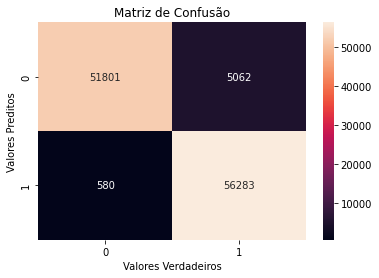

In [ ]:
# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.0804 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999845,0.909027,0.952276,56863.000000
1.0,0.017287,0.919192,0.033936,99.000000
accuracy,0.909045,0.909045,0.909045,0.909045
macro avg,0.508566,0.914109,0.493106,56962.000000
weighted avg,0.998138,0.909045,0.950680,56962.000000


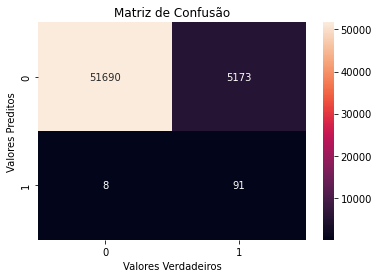

In [ ]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.


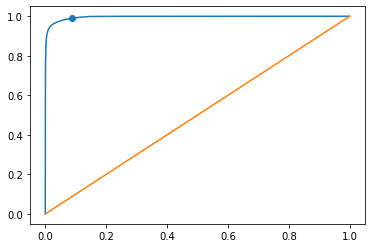

Best Threshold: 0.2957
Area Under the Curve: 0.9962


In [ ]:
# Probabilidades dos dados de validação (não fraudes)
val_prob_nf = val_prob[y_val == 0]

# Verificando limiar
threshold = np.quantile(val_prob_nf,.95)


y_val_pred = (val_prob>=threshold)
tpr_percentile = recall_score(y_val,y_val_pred)
fpr_percentile = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [ ]:
# Realizando as previsões para o limiar encontrado
y_val_pred_std = (val_prob>=threshold)


y_test_pred_std = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.9715 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.976041,0.949985,0.962837,56863.000000
1.0,0.951286,0.976681,0.963816,56863.000000
accuracy,0.963333,0.963333,0.963333,0.963333
macro avg,0.963663,0.963333,0.963326,113726.000000
weighted avg,0.963663,0.963333,0.963326,113726.000000


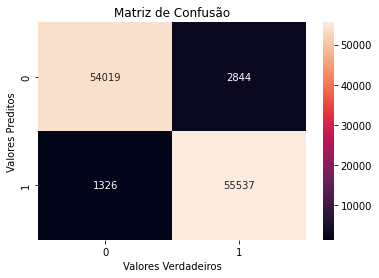

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.1297 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999833,0.947523,0.972975,56863.000000
1.0,0.029278,0.909091,0.056729,99.000000
accuracy,0.947456,0.947456,0.947456,0.947456
macro avg,0.514555,0.928307,0.514852,56962.000000
weighted avg,0.998146,0.947456,0.971383,56962.000000


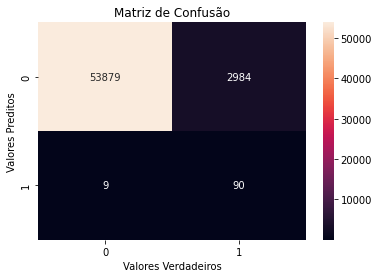

In [ ]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

*************************   Dados de Teste   *************************


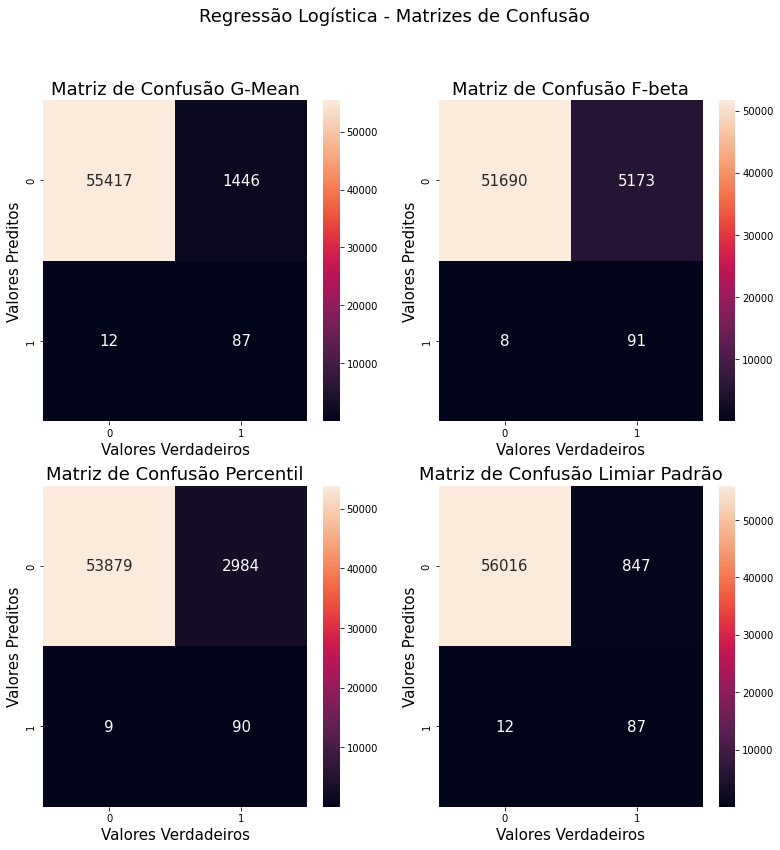

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(2,2)
fig.set_size_inches(6.5*2,6.5*2)

axes = axes.ravel()

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão G-Mean',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# F-beta
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão F-beta',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)




# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Percentil',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

AUC_ROC = roc_auc_score(y_test,test_prob)


average_precision = average_precision_score(y_test,test_prob)



y_test_pred = (test_prob>=0.5)


# Standard prediction
ax = axes[3]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax,annot_kws={"size":15})
ax.set_title('Matriz de Confusão Limiar Padrão',fontsize=18)
ax.set_xlabel('Valores Verdadeiros',fontsize=15)
ax.set_ylabel('Valores Preditos',fontsize=15)

fig.suptitle("Regressão Logística - Matrizes de Confusão",fontsize=18)


fig.patch.set_alpha(1.0)


performance = {"AUC ROC":AUC_ROC,"Average Precision": average_precision,
                "Classification Report G-Mean":classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True),
                "Classification Report F-Beta":classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True),
                "Classification Report Percentil":classification_report(y_test.reshape(-1),y_test_pred_std,digits=2,output_dict=True)}
with open("performance/performance_logisticregression.json","w",encoding="utf-8") as f:
    json.dump(performance,f)


fig.savefig('figures/part2/confusion_matrix_log_reg.pdf', bbox_inches='tight')
fig.savefig('figures/part2/confusion_matrix_log_reg.png', bbox_inches='tight')
plt.show()

### Conclusões para os limiares

Os diferentes limiares apresentam uma variedade maior de possibilidades, porém os novos limiares **apresentar dados/informações**


In [ ]:
import imgkit


path_wkthmltoimage = r'C:/Program Files/wkhtmltopdf/bin/wkhtmltoimage.exe'
config = imgkit.config(wkhtmltoimage=path_wkthmltoimage)
options = {'width':450, 'disable-smart-width': ''}
path = 'E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\performance\html_performance_test2.html'
with open(path,"r",encoding="utf-8") as f:
    html = f.read()


path_model = "E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\codes_medium_post\jupyter_table.html"
with open(path_model,"r",encoding="utf-8") as f:
    html_model = f.read()

html = f"{html_model}\n{html}\n</div>"

path = 'E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\codes_medium_post\html.html'
with open(path,"w",encoding="utf-8") as f:
    f.write(html)


imgkit.from_file(path, 'performance_test2.jpg',options=options,config=config)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [ ]:
import imgkit


path_wkthmltoimage = r'C:/Program Files/wkhtmltopdf/bin/wkhtmltoimage.exe'
config = imgkit.config(wkhtmltoimage=path_wkthmltoimage)
options = {'width':450, 'disable-smart-width': ''}
path = 'E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\performance\html_performance_test1.html'
with open(path,"r",encoding="utf-8") as f:
    html = f.read()


path_model = "E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\codes_medium_post\jupyter_table.html"
with open(path_model,"r",encoding="utf-8") as f:
    html_model = f.read()

html = f"{html_model}\n{html}\n</div>"

path = 'E:\Escola\Data Science\Machine Learning\GitHub_Machine_Learning\Credit_Card_Fraud\codes_medium_post\html.html'
with open(path,"w",encoding="utf-8") as f:
    f.write(html)


imgkit.from_file(path, 'performance_test1.jpg',options=options,config=config)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True